# DS 6021 Final Project: An Analysis of Obesity Levels from Nutrition and Physical Characteristics

Erin Siedlecki, Natalie Seah, Emily Garman, Bela Barton, & Ben Doniger

## Introduction & Dataset Summary

In [4]:
# Add research Qs

## Data Engineering & Preparation

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.compose import ColumnTransformer


In [6]:
# Bela insert code here

In [7]:
df = pd.read_csv('/Users/natalieseah/Desktop/MLFinalProject/MLFinalProject/obesity_cleaned.csv')

In [8]:
df['BMI (kg/m2)'] = round(df['Weight'] / (df['Height'] ** 2),2)

In [9]:
df.head(5)

,Gender,Age,Height,Weight,Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
0,Female,21.0,1.62,64.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,3-5 hours,Never,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,Yes,No,Always,3,Sometimes,Yes,More than 2 liters,Yes,4 to 5 days a week,0-2 hours,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,3-5 hours,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,No,No,Always,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,0-2 hours,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,No,No,Sometimes,1,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,0-2 hours,Sometimes,Public Transportation,Overweight Level II,28.34


In [10]:
df = df.rename(columns={'Height': 'Height (m)', 'Weight': 'Weight (kg)'})
df.head(5)

,Gender,Age,Height (m),Weight (kg),Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
0,Female,21.0,1.62,64.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,3-5 hours,Never,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,Yes,No,Always,3,Sometimes,Yes,More than 2 liters,Yes,4 to 5 days a week,0-2 hours,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,3-5 hours,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,No,No,Always,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,0-2 hours,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,No,No,Sometimes,1,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,0-2 hours,Sometimes,Public Transportation,Overweight Level II,28.34


## Visualization & Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height (m)                      2111 non-null   float64
 3   Weight (kg)                     2111 non-null   float64
 4   Overweight_Family_History       2111 non-null   object 
 5   High_Calorie_Consumption_Often  2111 non-null   object 
 6   Vegetable_Consumption_Often     2111 non-null   object 
 7   Num_Main_Meals_Daily            2111 non-null   int64  
 8   Eat_Between_Meals               2111 non-null   object 
 9   Smoke_Regularly                 2111 non-null   object 
 10  Water_Drank_Daily               2111 non-null   object 
 11  Calories_Monitored_Daily        2111 non-null   object 
 12  Workout_Frequency               21

In [12]:
numeric = df[['Age', 'Height (m)', 'Weight (kg)', 'Num_Main_Meals_Daily', 'BMI (kg/m2)']]
num_corr = numeric.corr()
num_corr

,Age,Height (m),Weight (kg),Num_Main_Meals_Daily,BMI (kg/m2)
Age,1.000000,-0.025958,0.202560,-0.043367,0.244149
Height (m),-0.025958,1.000000,0.463136,0.244055,0.131788
Weight (kg),0.202560,0.463136,1.000000,0.103273,0.934807
Num_Main_Meals_Daily,-0.043367,0.244055,0.103273,1.000000,0.033819
BMI (kg/m2),0.244149,0.131788,0.934807,0.033819,1.000000


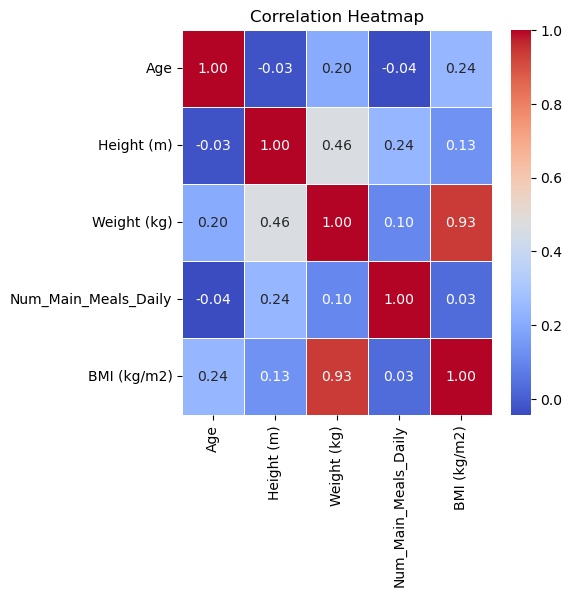

In [13]:
plt.figure(figsize=(5, 5))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

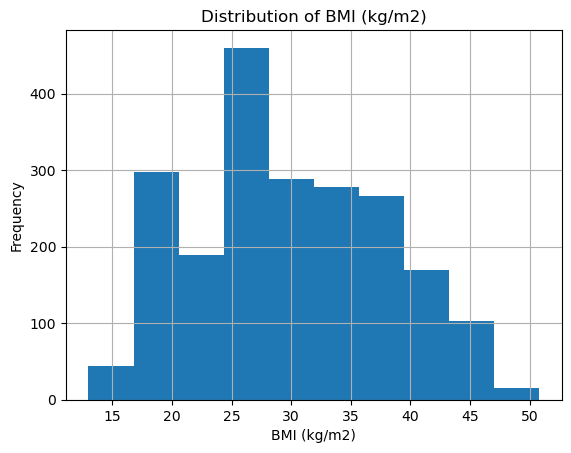

In [14]:
df['BMI (kg/m2)'].hist()
plt.title('Distribution of BMI (kg/m2)')
plt.xlabel('BMI (kg/m2)')
plt.ylabel('Frequency')
plt.show()

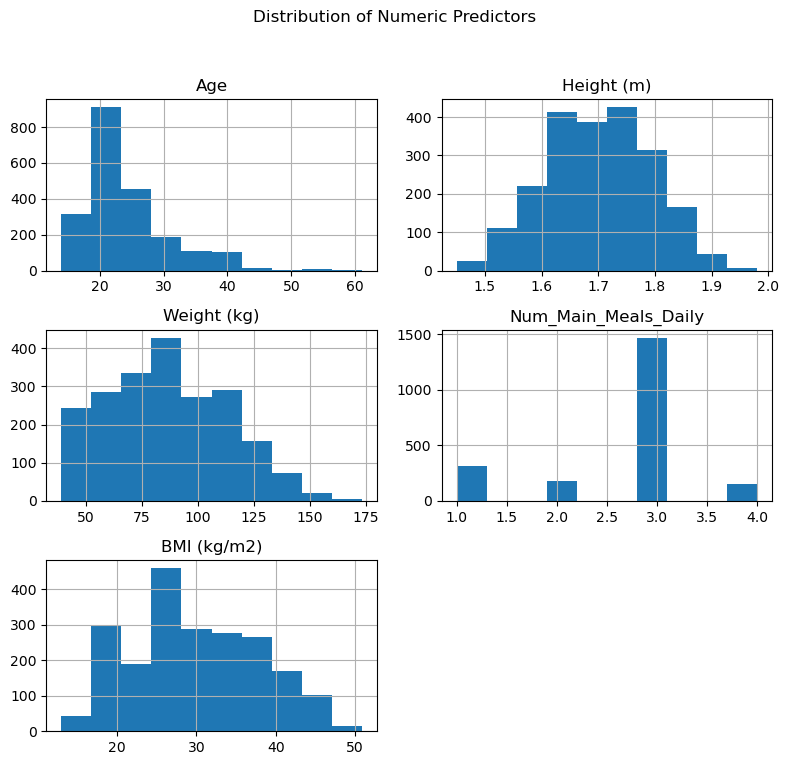

In [15]:
numeric.hist(figsize=(8,8))
plt.suptitle('Distribution of Numeric Predictors')
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

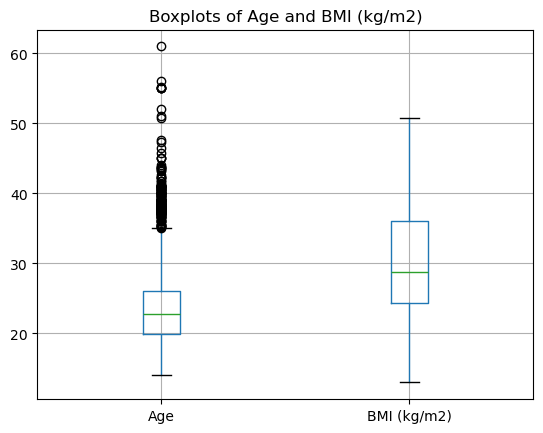

In [16]:
df[['Age', 'BMI (kg/m2)']].boxplot()
plt.title('Boxplots of Age and BMI (kg/m2)')
plt.show()

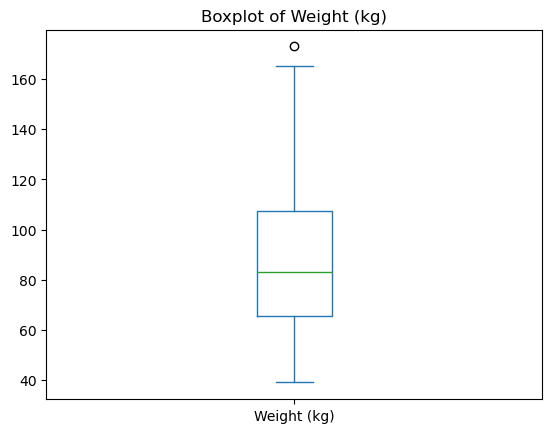

In [17]:
df['Weight (kg)'].plot.box()
plt.title('Boxplot of Weight (kg)')
plt.show()

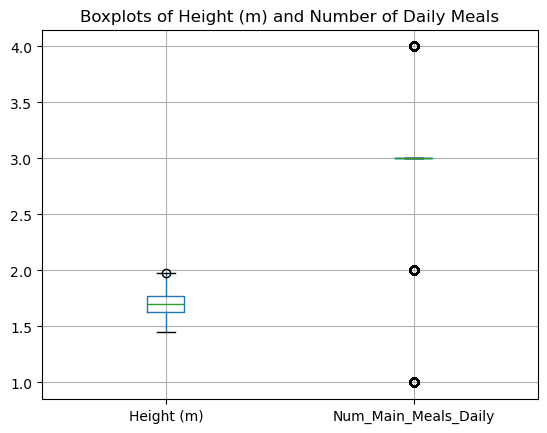

In [18]:
df[['Height (m)', 'Num_Main_Meals_Daily']].boxplot()
plt.title('Boxplots of Height (m) and Number of Daily Meals')
plt.show()

In [19]:
df.describe()

,Age,Height (m),Weight (kg),Num_Main_Meals_Daily,BMI (kg/m2)
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.687826,29.700137
std,6.345968,0.093305,26.191172,0.809680,8.011354
min,14.000000,1.450000,39.000000,1.000000,13.000000
25%,19.947192,1.630000,65.473343,3.000000,24.325000
50%,22.777890,1.700499,83.000000,3.000000,28.720000
75%,26.000000,1.768464,107.430682,3.000000,36.015000
max,61.000000,1.980000,173.000000,4.000000,50.810000


In [20]:
df.describe(include='all')

,Gender,Age,Height (m),Weight (kg),Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111,2111.000000,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111.000000
unique,2,NaN,NaN,NaN,2,2,3,NaN,4,2,3,2,4,3,4,5,7,NaN
top,Male,NaN,NaN,NaN,Yes,Yes,Sometimes,NaN,Sometimes,No,Between 1 and 2 liters,No,1 or 2 days a week,0-2 hours,Sometimes,Public Transportation,Obesity Type I,NaN
freq,1068,NaN,NaN,NaN,1726,1866,1013,NaN,1765,2067,1110,2015,776,952,1401,1580,351,NaN
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,NaN,2.687826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.700137
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,NaN,0.809680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.011354
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.325000
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.720000
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.015000


In [21]:
categorical = df.select_dtypes(include='object').columns

for col in categorical:
    print(df[col].value_counts())
    print('-' * 30)

Gender
Male      1068
Female    1043
Name: count, dtype: int64
------------------------------
Overweight_Family_History
Yes    1726
No      385
Name: count, dtype: int64
------------------------------
High_Calorie_Consumption_Often
Yes    1866
No      245
Name: count, dtype: int64
------------------------------
Vegetable_Consumption_Often
Sometimes    1013
Always        996
Never         102
Name: count, dtype: int64
------------------------------
Eat_Between_Meals
Sometimes     1765
Frequently     242
Always          53
Never           51
Name: count, dtype: int64
------------------------------
Smoke_Regularly
No     2067
Yes      44
Name: count, dtype: int64
------------------------------
Water_Drank_Daily
Between 1 and 2 liters    1110
More than 2 liters         516
Less than a liter          485
Name: count, dtype: int64
------------------------------
Calories_Monitored_Daily
No     2015
Yes      96
Name: count, dtype: int64
------------------------------
Workout_Frequency
1 or 2 d

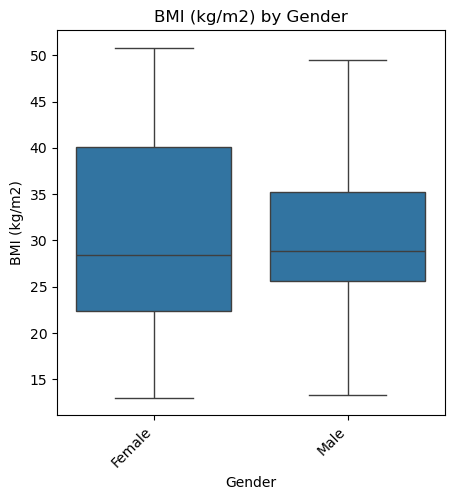

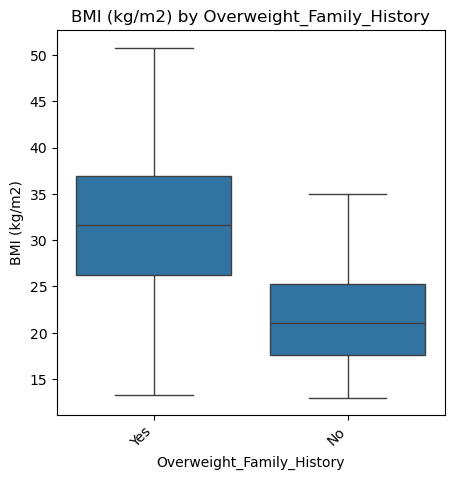

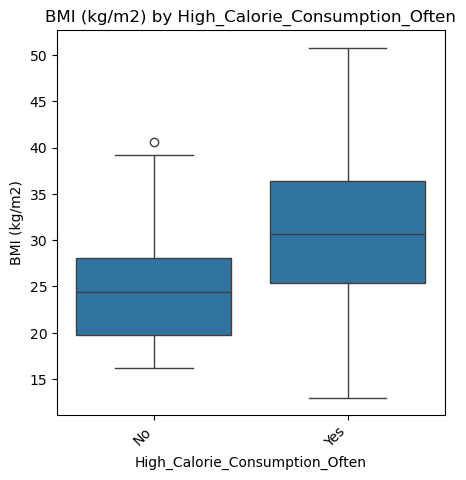

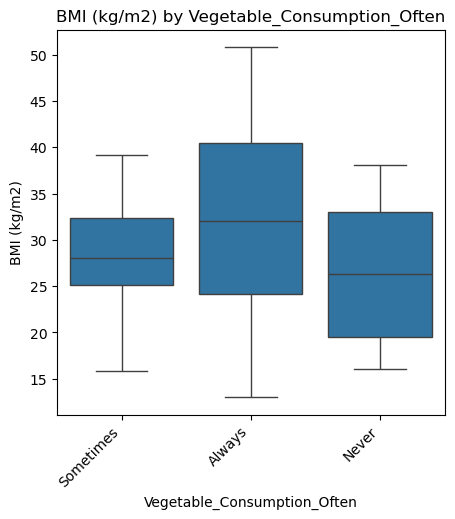

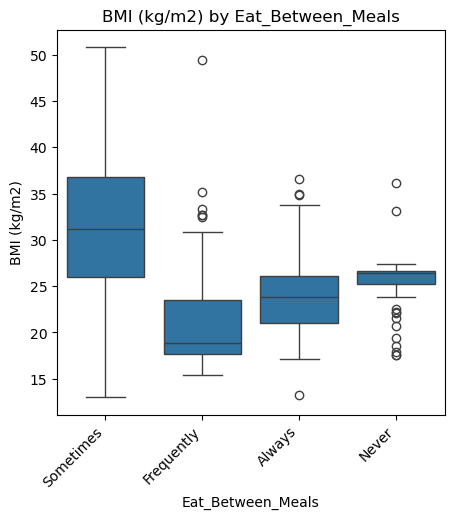

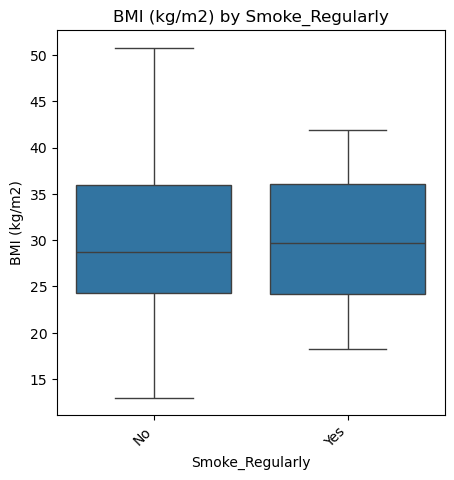

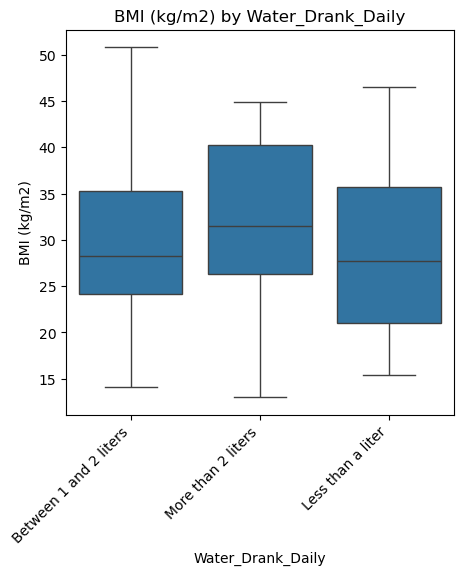

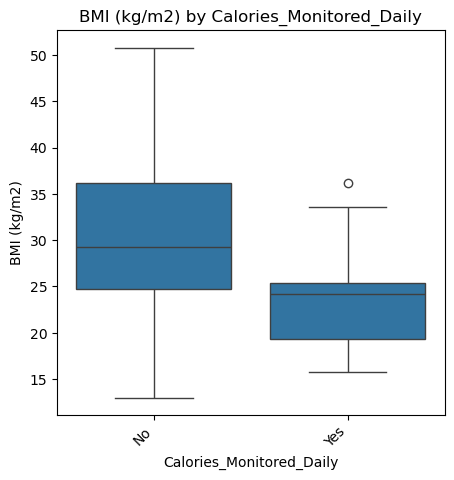

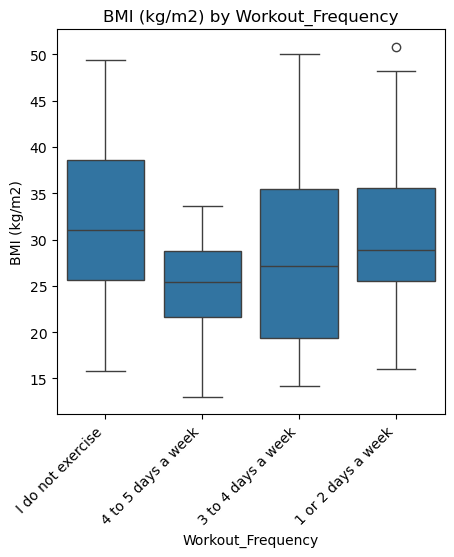

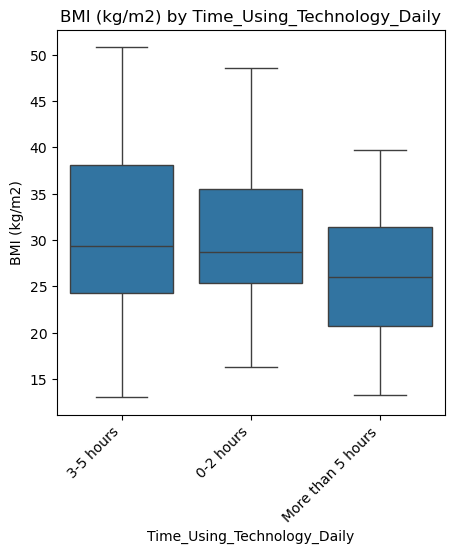

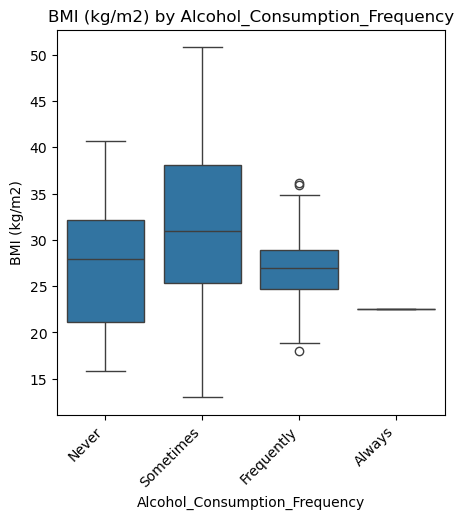

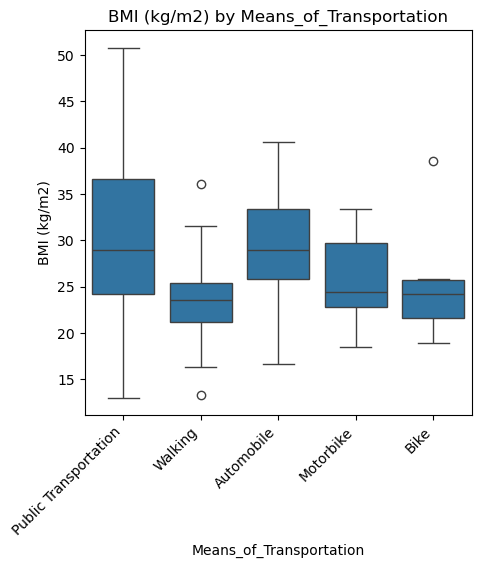

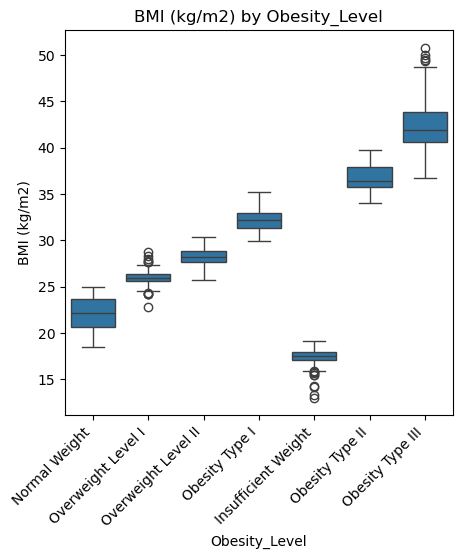

In [22]:
for col in categorical:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=col, y='BMI (kg/m2)', data=df)
    plt.title(f'BMI (kg/m2) by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

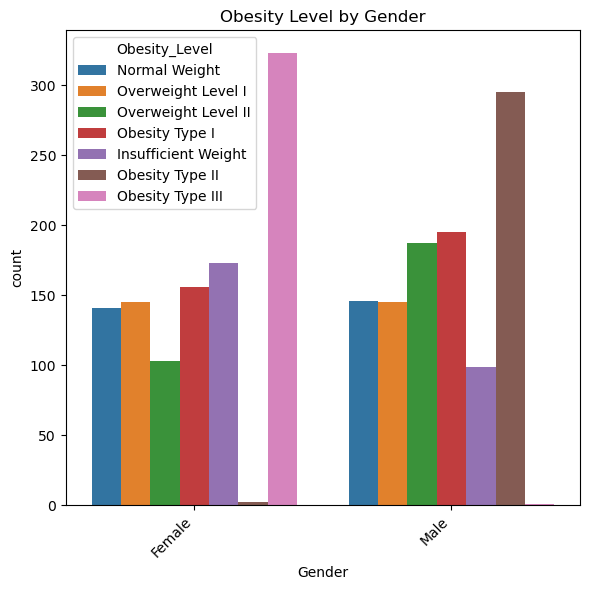

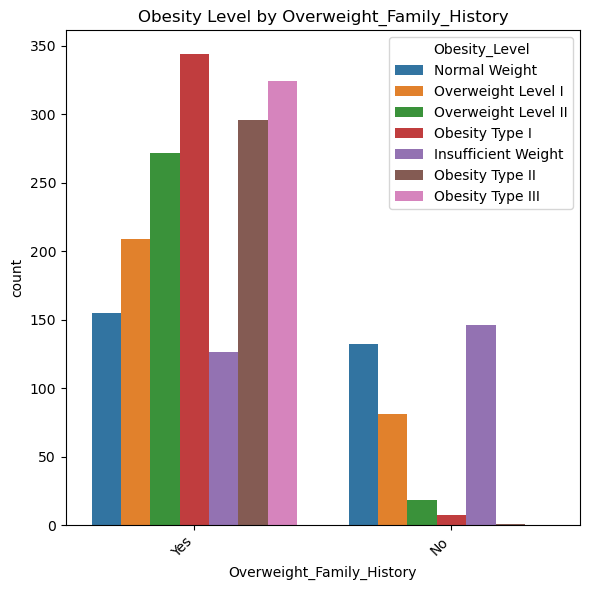

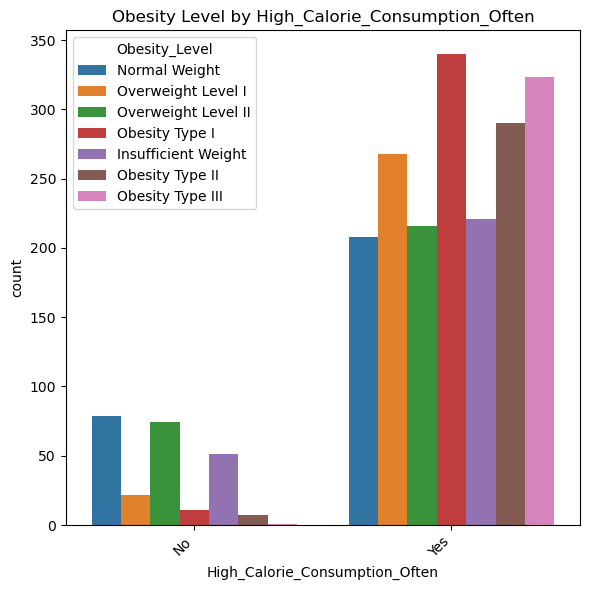

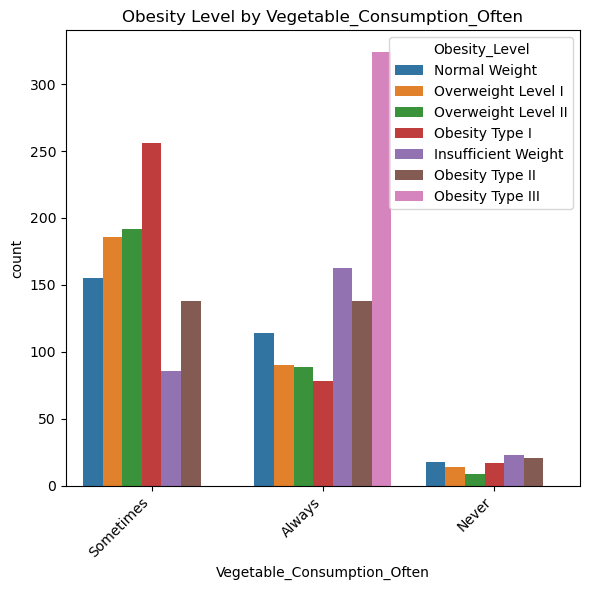

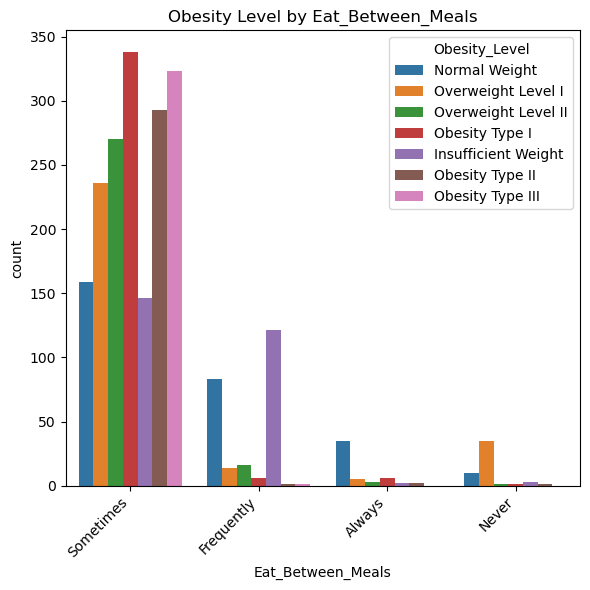

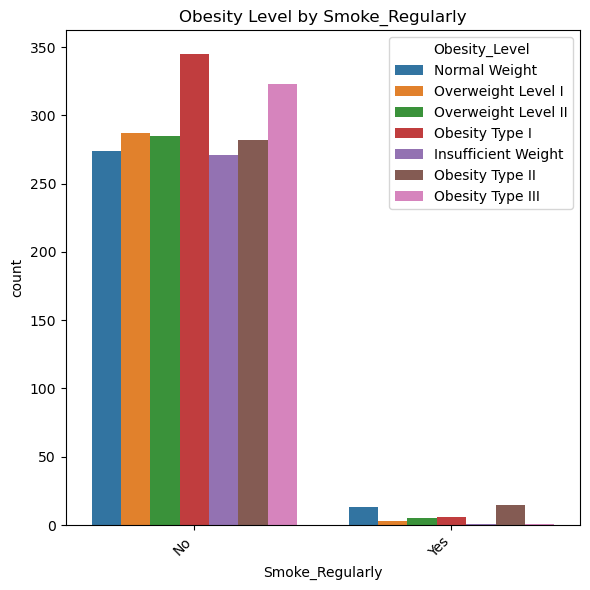

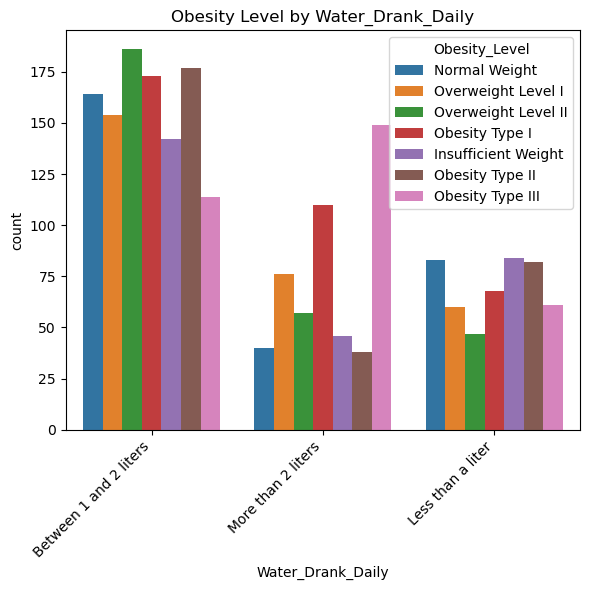

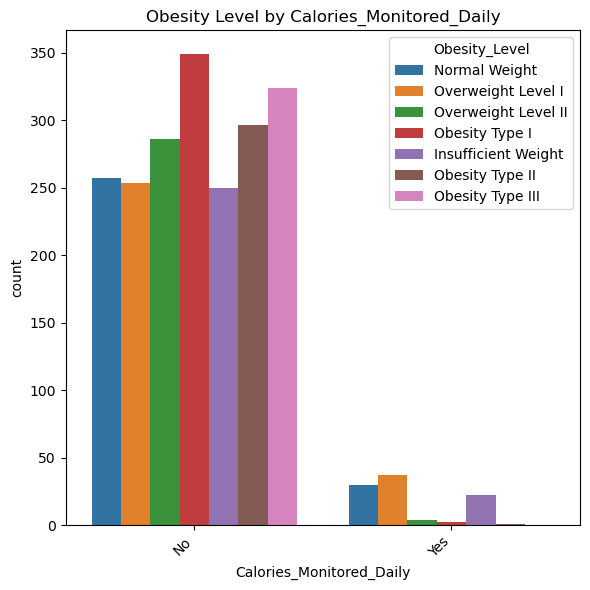

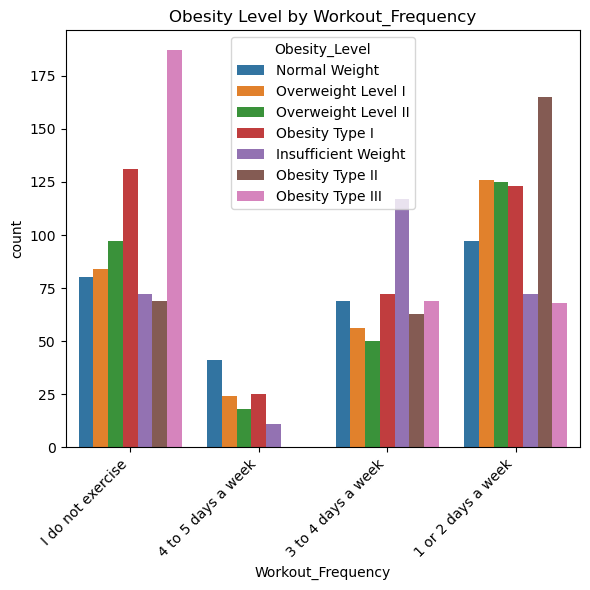

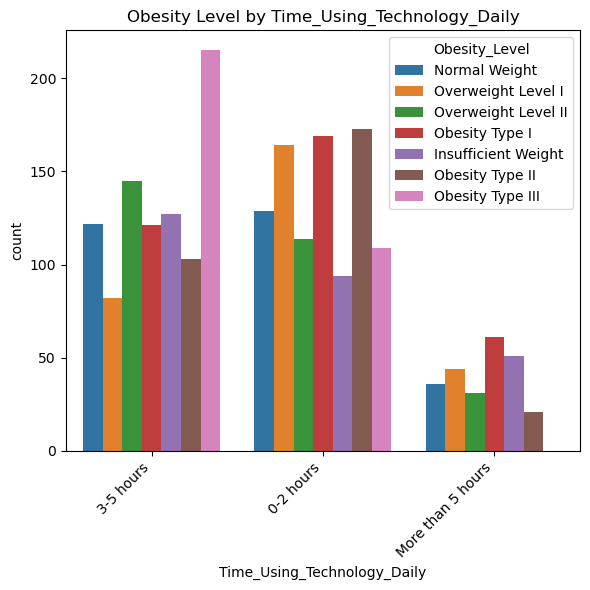

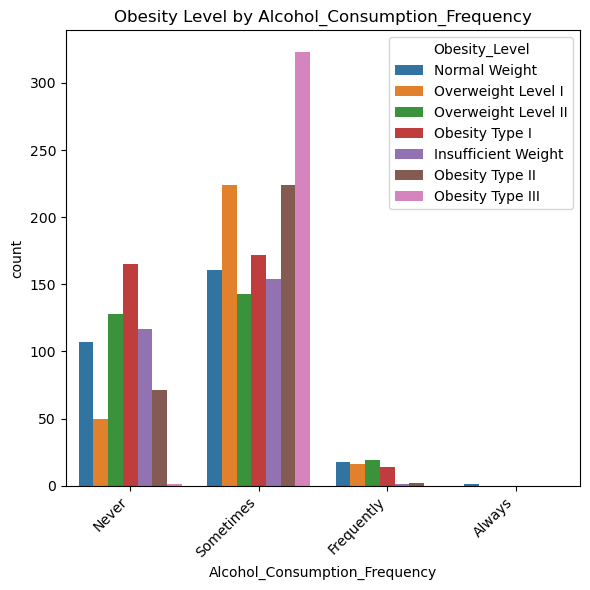

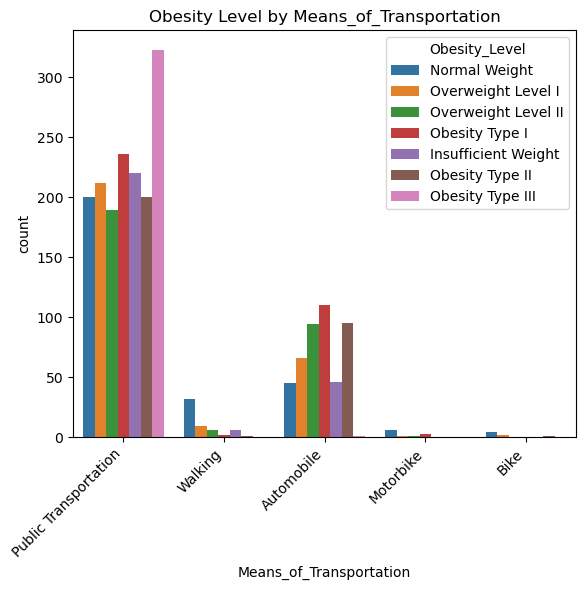

In [23]:
cat2 = categorical.drop('Obesity_Level')
for col in cat2:
    plt.figure(figsize=(6,6))
    sns.countplot(x=col, hue='Obesity_Level', data=df)
    plt.title(f'Obesity Level by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Model 1: Multiple Regression

Which eating habits, lifestyle factors, and physical activity factors are most predictive of BMI?

In [24]:
target = 'BMI (kg/m2)'
nums = ['Age']
cats = [
    'Overweight_Family_History',
    'High_Calorie_Consumption_Often',
    'Vegetable_Consumption_Often',
    'Calories_Monitored_Daily',
    'Workout_Frequency',
    'Alcohol_Consumption_Frequency',
    'Means_of_Transportation'
]

X = df[nums + cats]
y = df[target]

# train test split (CHECK IF THIS SHOULD BE DONE BEFORE PREPROCESSING STEP)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset indices so X and y align
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [25]:
preprocess = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(drop="first"), cats),
        ("numeric", "passthrough", nums)
    ]
)

X_train_processed = preprocess.fit_transform(X_train)
X_test_processed = preprocess.transform(X_test)

feature_names = preprocess.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

X_train_sm = sm.add_constant(X_train_df)
model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            BMI (kg/m2)   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     77.88
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          1.03e-188
Time:                        21:19:35   Log-Likelihood:                -5430.7
No. Observations:                1688   AIC:                         1.090e+04
Df Residuals:                    1671   BIC:                         1.099e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [27]:
X_test_sm = sm.add_constant(X_test_df)
y_pred = model.predict(X_test_sm)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nR² = {r2:.3f}, RMSE = {rmse:.3f}")


R² = 0.401, RMSE = 6.292


In [32]:
#F-test to check if categorical variables are significant overall

for cat in cats:
    dummy_cols = [c for c in X_train_df.columns if c.startswith(f"encoder__{cat}")]
    
    if dummy_cols:
        # F-test
        f_test = model.f_test(" + ".join(dummy_cols) + " = 0")
        f_stat = f_test.fvalue if isinstance(f_test.fvalue, float) else f_test.fvalue[0][0]
        
        print(f"{cat}: F = {f_stat:.2f}, p = {f_test.pvalue:.4f}")



Overweight_Family_History: F = 451.51, p = 0.0000
High_Calorie_Consumption_Often: F = 19.21, p = 0.0000
Vegetable_Consumption_Often: F = 77.08, p = 0.0000
Calories_Monitored_Daily: F = 12.09, p = 0.0005
Workout_Frequency: F = 1.99, p = 0.1584
Alcohol_Consumption_Frequency: F = 0.21, p = 0.6445
Means_of_Transportation: F = 8.86, p = 0.0030


The Workout_Frequency and Alcohol_Consumption_Frequency values are non-significant predictors overall, so I will remove them from the model and refit it.

In [37]:
cats1 = [
    'Overweight_Family_History',
    'High_Calorie_Consumption_Often',
    'Vegetable_Consumption_Often',
    'Calories_Monitored_Daily',
    'Means_of_Transportation'
]


preprocess_refit = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(drop="first"), cats1),
        ("numeric", "passthrough", nums)
    ]
)

X_train_processed_refit = preprocess_refit.fit_transform(X_train)
X_test_processed_refit = preprocess_refit.transform(X_test)

feature_names_refit = preprocess_refit.get_feature_names_out()
X_train_df_refit = pd.DataFrame(X_train_processed_refit, columns=feature_names_refit)
X_test_df_refit = pd.DataFrame(X_test_processed_refit, columns=feature_names_refit)


X_train_sm_refit = sm.add_constant(X_train_df_refit)
model_refit = sm.OLS(y_train, X_train_sm_refit).fit()

print(model_refit.summary())


                            OLS Regression Results                            
Dep. Variable:            BMI (kg/m2)   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     105.1
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          2.97e-169
Time:                        21:47:21   Log-Likelihood:                -5490.3
No. Observations:                1688   AIC:                         1.100e+04
Df Residuals:                    1677   BIC:                         1.106e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [39]:
X_test_sm_refit = sm.add_constant(X_test_df_refit)
y_pred_refit = model_refit.predict(X_test_sm_refit)

r2_refit = r2_score(y_test, y_pred_refit)
rmse_refit = np.sqrt(mean_squared_error(y_test, y_pred_refit))

print(f"\nR² (test) = {r2_refit:.3f}, RMSE (test) = {rmse_refit:.3f}")


R² (test) = 0.373, RMSE (test) = 6.436


SHOULD I PUT THE VARIABLES BACK IF ADJ R^2 AND RMSE GOT WORSE???

## Check Assumptions (Multiple Regression)

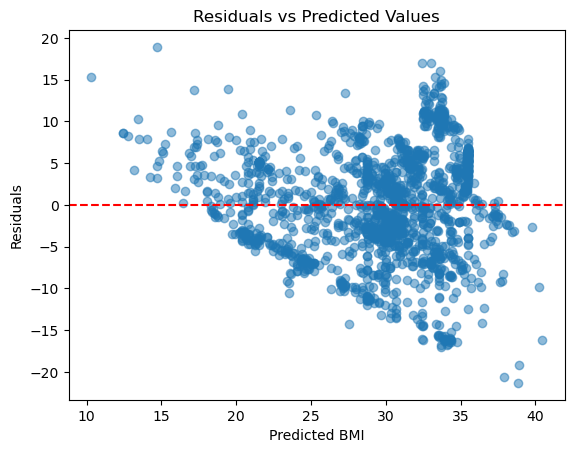

In [40]:
y_pred = model_refit.fittedvalues
residuals = model_refit.resid

# Residuals vs predicted
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted BMI")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

**ASK - does this violate linearity assumption? Is this the proper way to check? Would do scatterplots but most vars are categorical..

2. Independence: Because the Durbin–Watson statistic was 2.088, very close to 2, the independence assumption is satisfied.

3. Constant variance of errors: There is a clear pattern when the residuals are plotted, so this assumption is violated. I will try transforming the response variable.

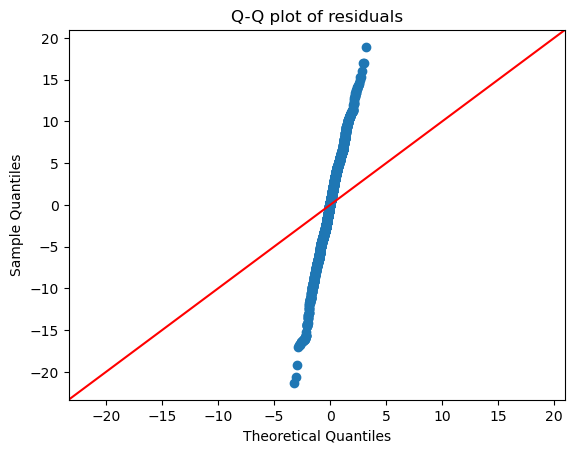

In [41]:
sm.qqplot(residuals, line='45')
plt.title("Q-Q plot of residuals")
plt.show()

4. Normality assumption: the residuals deviate substantially from the red diagonal line - they’re tightly clustered and show clear deviations in both tails. This means that this assumption has been violated so I will try a transformation of the response variable.

In [42]:
X_df = pd.DataFrame(model_refit.model.exog, columns=model_refit.model.exog_names)

vif = pd.DataFrame()
vif['Variable'] = X_df.columns
vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif)

                                             Variable        VIF
0                                               const  56.507080
1              encoder__Overweight_Family_History_Yes   1.117608
2         encoder__High_Calorie_Consumption_Often_Yes   1.118169
3          encoder__Vegetable_Consumption_Often_Never   1.070496
4      encoder__Vegetable_Consumption_Often_Sometimes   1.064227
5               encoder__Calories_Monitored_Daily_Yes   1.072490
6               encoder__Means_of_Transportation_Bike   1.018324
7          encoder__Means_of_Transportation_Motorbike   1.039408
8   encoder__Means_of_Transportation_Public Transp...   1.815444
9            encoder__Means_of_Transportation_Walking   1.255228
10                                       numeric__Age   1.685321


All the VIF values are below 2, indicating that there are no issues with multicollinearity.

# Log transform the response

In [47]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
X_train_sm_refit = sm.add_constant(X_train_df_refit)

# Fit model on log(y)
model_log = sm.OLS(y_train_log, X_train_sm_refit).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:            BMI (kg/m2)   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          3.34e-174
Time:                        22:20:18   Log-Likelihood:                 171.06
No. Observations:                1688   AIC:                            -320.1
Df Residuals:                    1677   BIC:                            -260.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

X_test_sm_refit = sm.add_constant(X_test_df_refit)  # add constant to test predictors
y_pred_log = model_log.predict(X_test_sm_refit)

#eval on log scale
r2_log = r2_score(y_test_log, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
print(f"R² (log scale) = {r2_log:.3f}, RMSE (log scale) = {rmse_log:.3f}")

#og scale
y_pred = np.exp(y_pred_log)
r2_orig = r2_score(y_test, y_pred)
rmse_orig = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² (original BMI scale) = {r2_orig:.3f}, RMSE = {rmse_orig:.3f}")

R² (log scale) = 0.374, RMSE (log scale) = 0.227
R² (original BMI scale) = 0.371, RMSE = 6.447


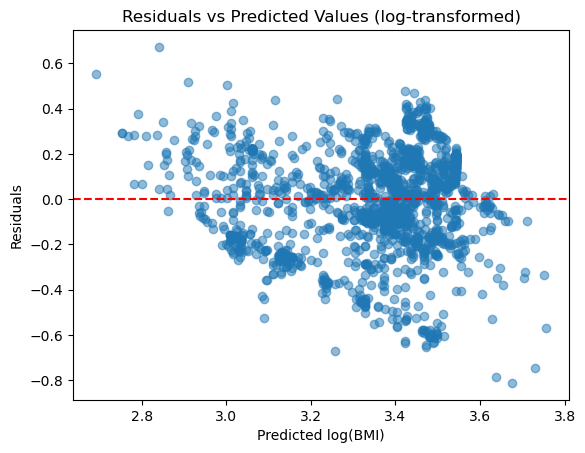

In [50]:
y_pred_log = model_log.fittedvalues     
residuals_log = model_log.resid  
plt.scatter(y_pred_log, residuals_log, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log(BMI)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (log-transformed)")
plt.show()

#Try square root transformation?

In [55]:
y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)

X_train_sm_refit = sm.add_constant(X_train_df_refit)
model_sqrt = sm.OLS(y_train_sqrt, X_train_sm_refit).fit()

print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:            BMI (kg/m2)   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     107.5
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          2.33e-172
Time:                        22:32:14   Log-Likelihood:                -1471.5
No. Observations:                1688   AIC:                             2965.
Df Residuals:                    1677   BIC:                             3025.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [56]:
X_test_sm_refit = sm.add_constant(X_test_df_refit)
y_pred_sqrt = model_sqrt.predict(X_test_sm_refit)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#sqrt scale
r2_sqrt = r2_score(y_test_sqrt, y_pred_sqrt)
rmse_sqrt = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_sqrt))
print(f"R² (sqrt scale) = {r2_sqrt:.3f}, RMSE (sqrt scale) = {rmse_sqrt:.3f}")

#og
y_pred = y_pred_sqrt**2  # back-transform
r2_orig = r2_score(y_test, y_pred)
rmse_orig = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² (original BMI scale) = {r2_orig:.3f}, RMSE = {rmse_orig:.3f}")


R² (sqrt scale) = 0.375, RMSE (sqrt scale) = 0.598
R² (original BMI scale) = 0.378, RMSE = 6.411


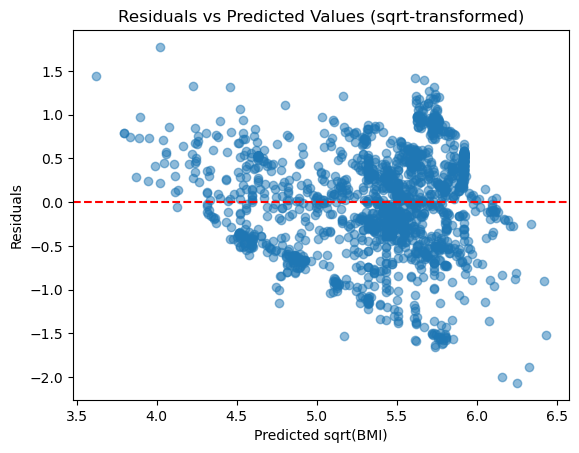

In [57]:
residuals_sqrt = y_train_sqrt - model_sqrt.fittedvalues

# Residuals vs fitted
import matplotlib.pyplot as plt
plt.scatter(model_sqrt.fittedvalues, residuals_sqrt, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted sqrt(BMI)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (sqrt-transformed)")
plt.show()